EDA

Our main objective is to answer key questions about the usage of precipitation data:

1) How the deforestation process correlates with precipitations?

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import geopandas as gpd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import box

import config
from utils import compute_frames

In [2]:
# load legal amazon limits
am_bounds = gpd.read_file(config.AMAZON_FRONTIER_DATA)

In [3]:
# load frames idx detail
frames_idx = pd.read_csv(config.TR_FRAMES_IDX, index_col=0)

In [4]:
# load frames deforestation area history
deforestation = pd.read_csv(config.TR_DEFORESTATION, index_col=0)
deforestation["quarter_date"] = pd.to_datetime(deforestation["quarter_date"])

In [10]:
# tpi
tpi = pd.read_csv(config.TR_TPI, skiprows=1)\
    .rename(columns={"Unnamed: 0": "frame_id"})

In [12]:
# relation tpi and deforestation
m = pd.merge(tpi, deforestation, on=["frame_id"], how="left")

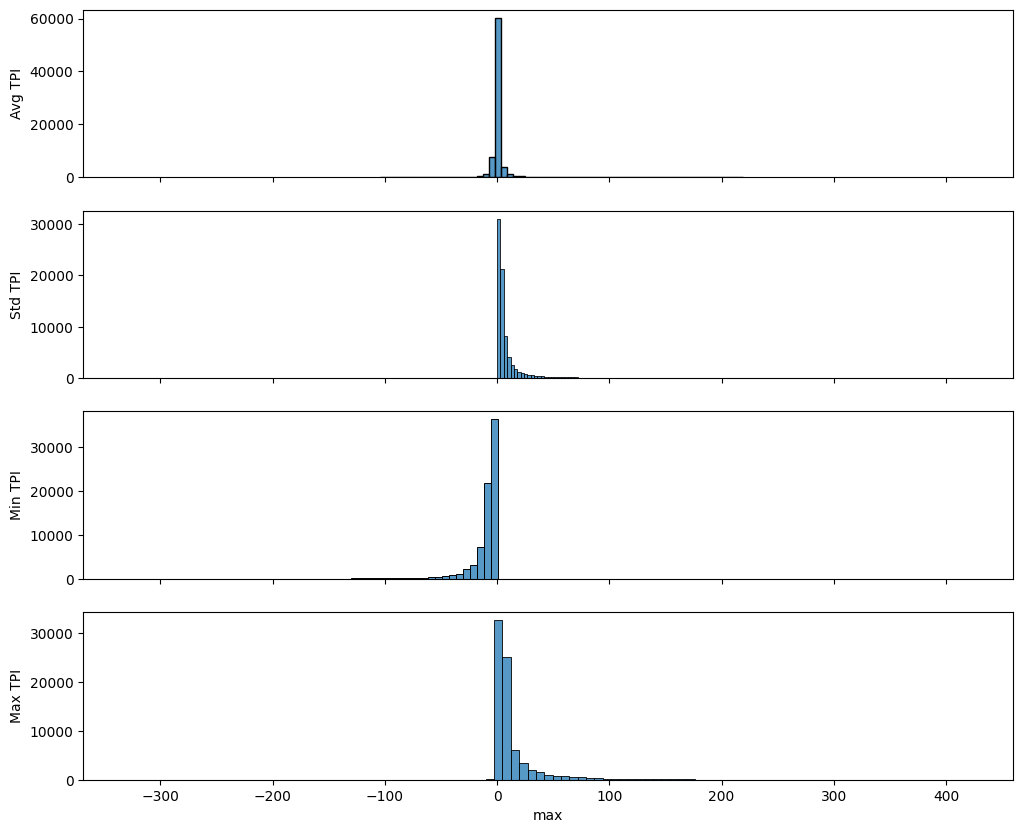

In [21]:
fig, ax = plt.subplots(4, figsize=(12, 10), sharex=True)
sns.histplot(tpi.sample(frac=0.1), x="mean", bins=60, ax=ax[0])
sns.histplot(tpi.sample(frac=0.1), x="std", bins=60, ax=ax[1])
sns.histplot(tpi.sample(frac=0.1), x="min", bins=60, ax=ax[2])
sns.histplot(tpi.sample(frac=0.1), x="max", bins=60, ax=ax[3])
ax[0].set_ylabel("Avg TPI")
ax[1].set_ylabel("Std TPI")
ax[2].set_ylabel("Min TPI")
ax[3].set_ylabel("Max TPI")
plt.show()

In [36]:
m["area"].describe()

count    2.654550e+05
mean     5.825571e-02
std      1.194420e-01
min      4.952383e-15
25%      7.225559e-03
50%      1.625438e-02
75%      4.811936e-02
max      1.000000e+00
Name: area, dtype: float64

In [47]:
m[m["area"] > 0].groupby("frame_id")[["mean","std", "min","max", "area"]].mean().corr()

,mean,std,min,max,area
mean,1.000000,0.241171,0.110814,0.381104,0.053566
std,0.241171,1.000000,-0.856265,0.936846,0.040354
min,0.110814,-0.856265,1.000000,-0.678797,-0.015434
max,0.381104,0.936846,-0.678797,1.000000,0.044045
area,0.053566,0.040354,-0.015434,0.044045,1.000000
